In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [5]:
df = pd.read_csv("raw/ObesityDataSet_raw_and_data_sinthetic.csv")




In [3]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Missing Values,Percentage
Gender,0,0.0
Age,0,0.0
Height,0,0.0
Weight,0,0.0
family_history_with_overweight,0,0.0
FAVC,0,0.0
FCVC,0,0.0
NCP,0,0.0
CAEC,0,0.0
SMOKE,0,0.0


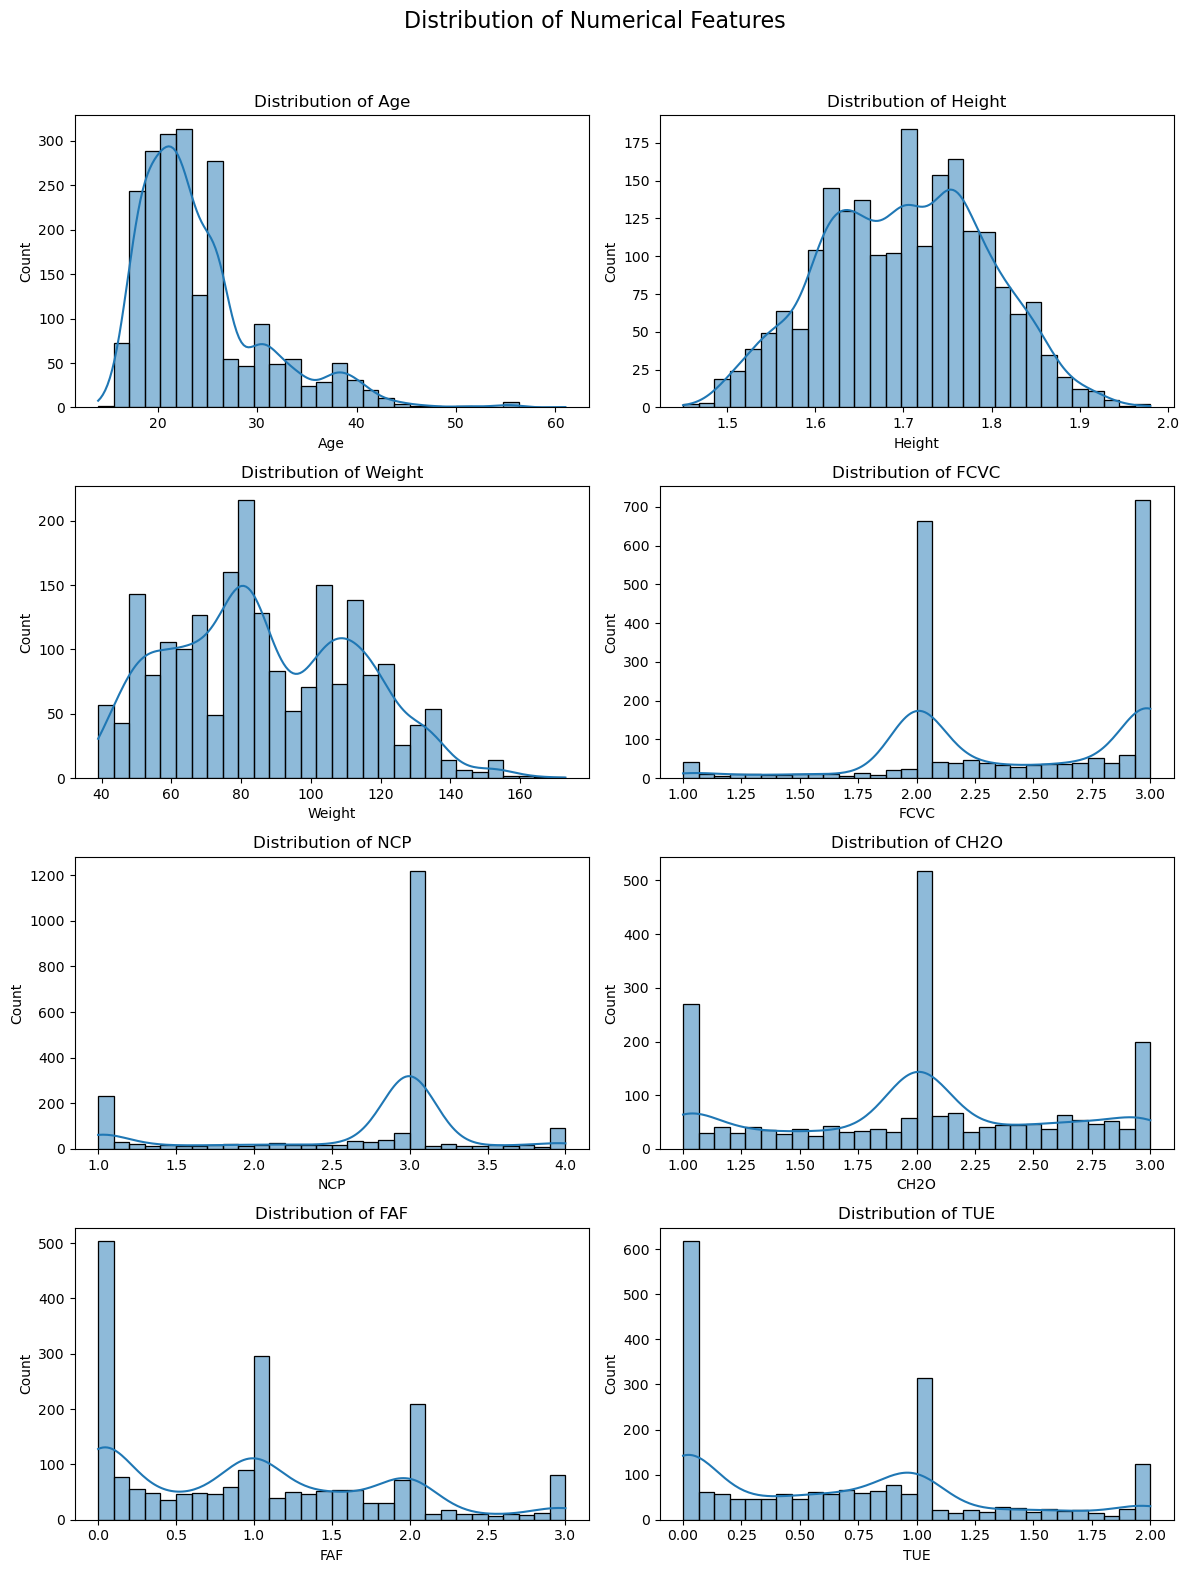

Number of duplicate rows: 24
Outliers detected per column:


,0
Age,168
Height,1
Weight,1
FCVC,0
NCP,579
CH2O,0
FAF,0
TUE,0


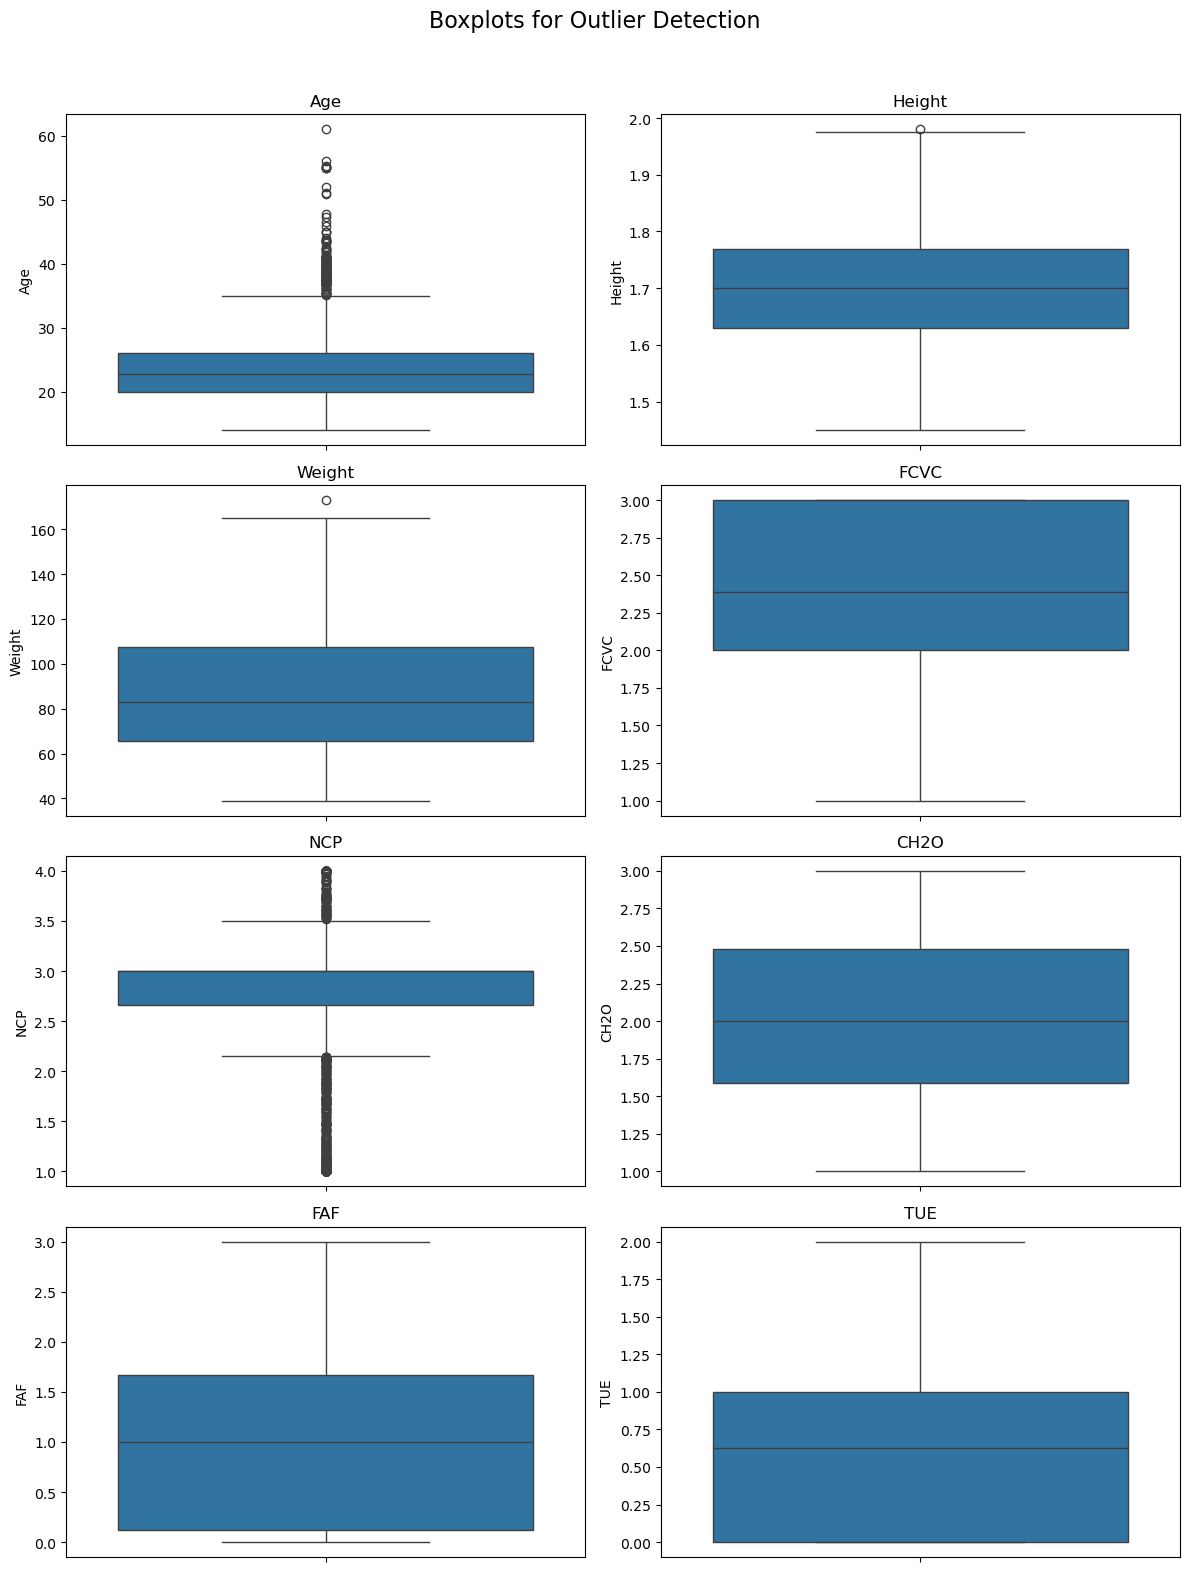

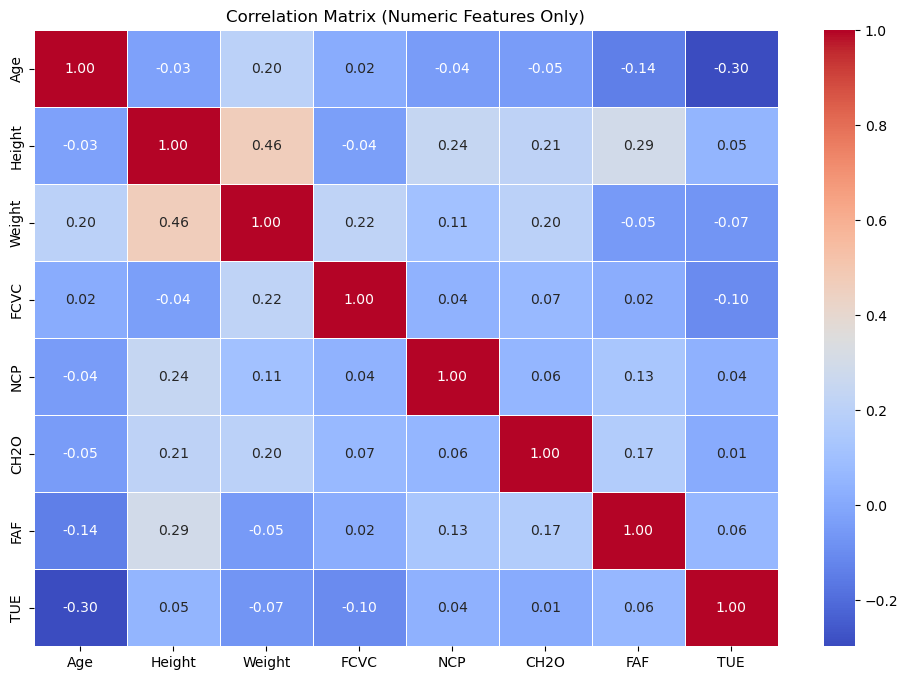

In [6]:
# Summary statistics
summary_statistics = df.describe()

# Check for missing values and calculate missing percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display summary statistics and missing values
display(summary_statistics)
display(missing_data)

# Distribution of numerical variables
numerical_features = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(12, 16))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Identifying duplicate values
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Identifying outliers using the IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()
print("Outliers detected per column:")
display(outliers.to_frame())

# Visualizing outliers using boxplots
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(12, 16))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Correlation matrix for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()


Class Distribution:
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


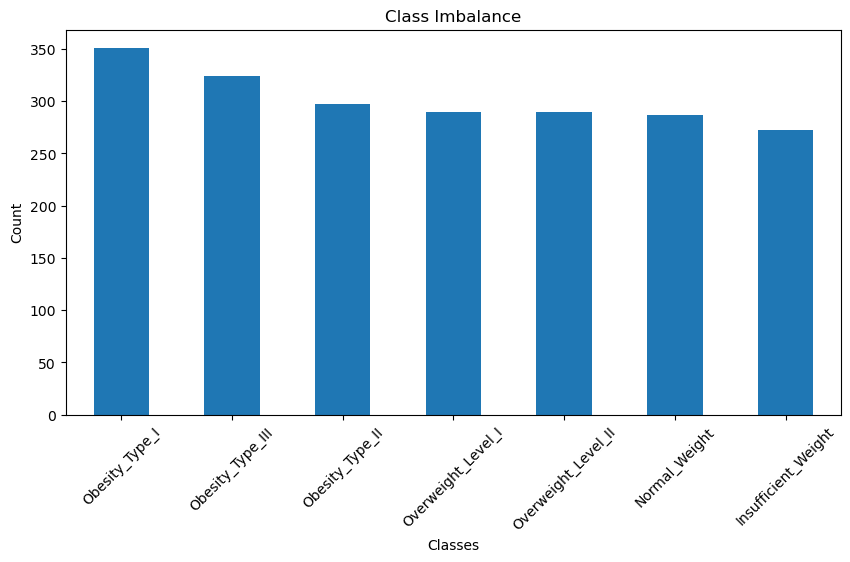

In [7]:

# Check class distribution
target_column = "NObeyesdad"  # Replace with your actual target column
class_counts = df[target_column].value_counts()

# Print class distribution
print("Class Distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(10, 5))
class_counts.plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Imbalance")
plt.xticks(rotation=45)
plt.show()

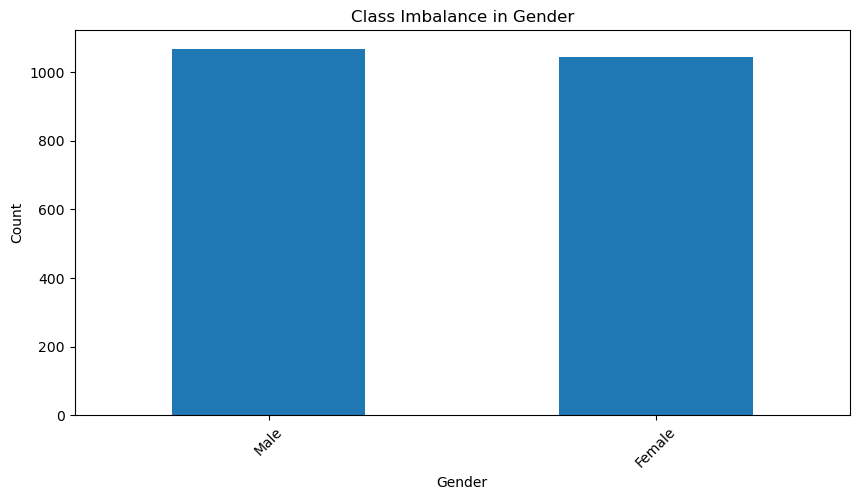

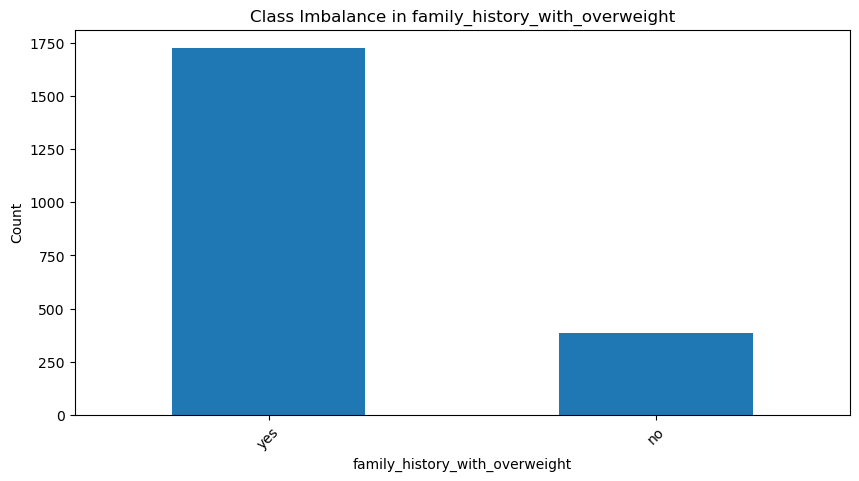

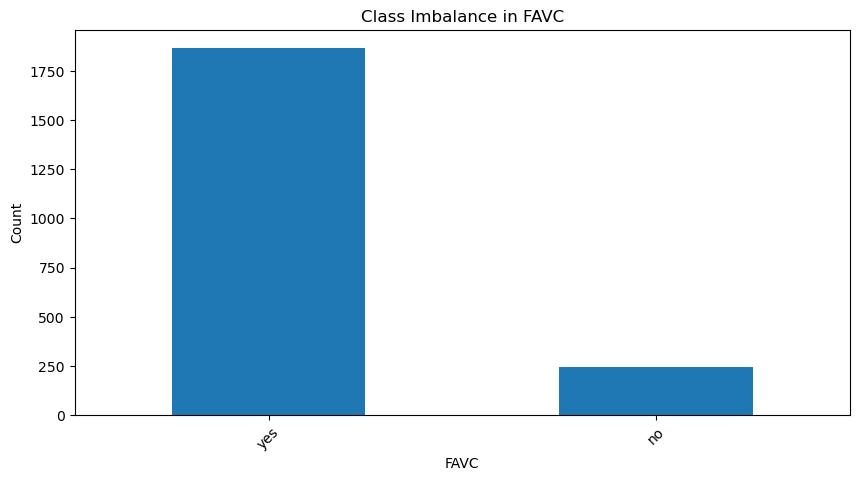

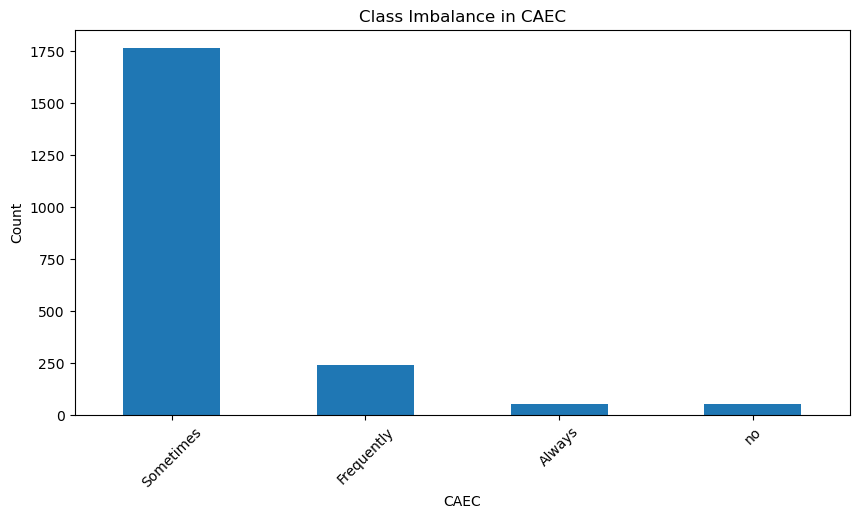

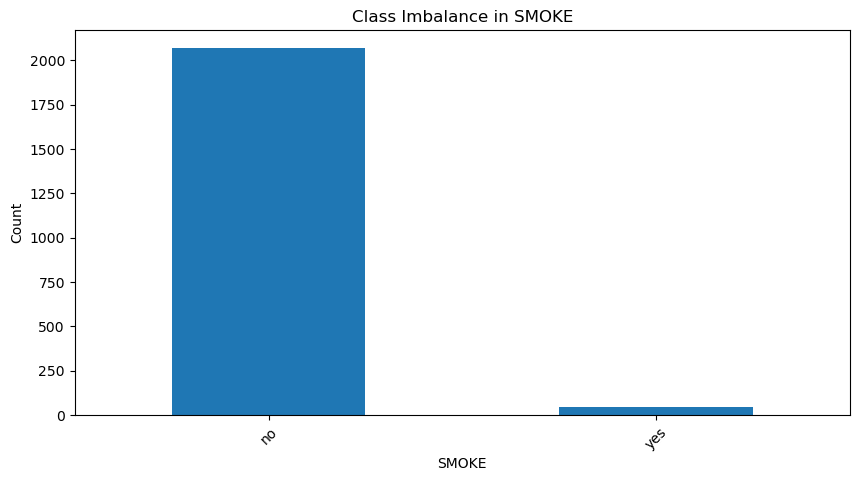

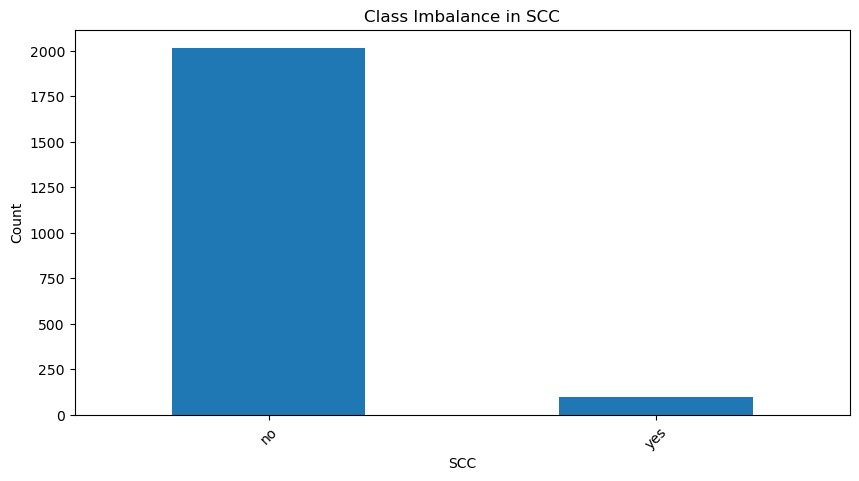

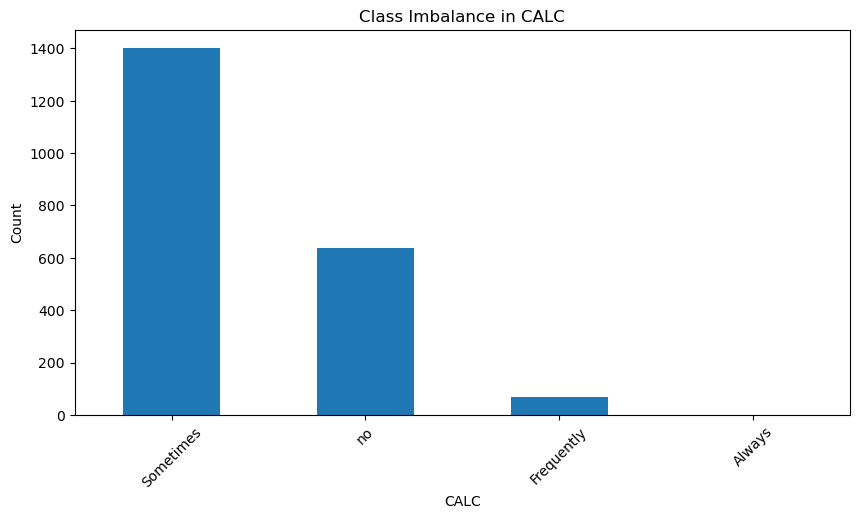

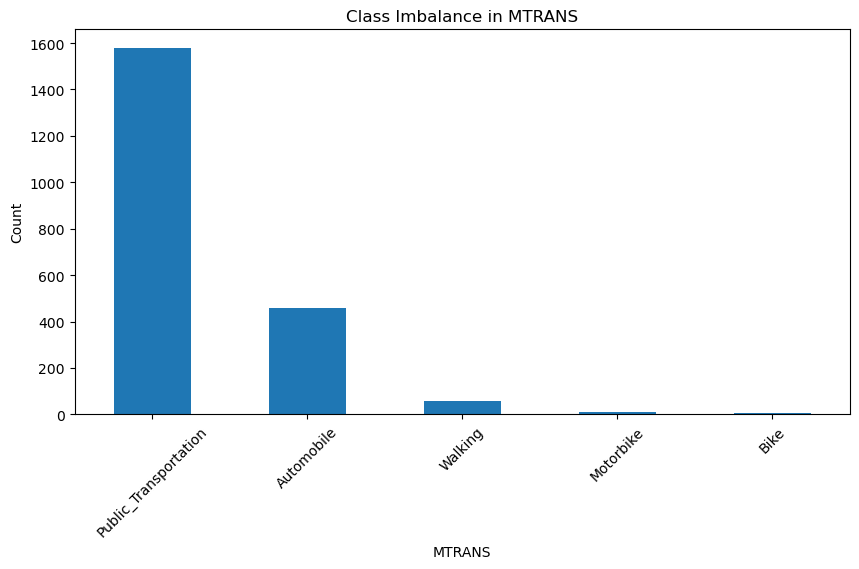

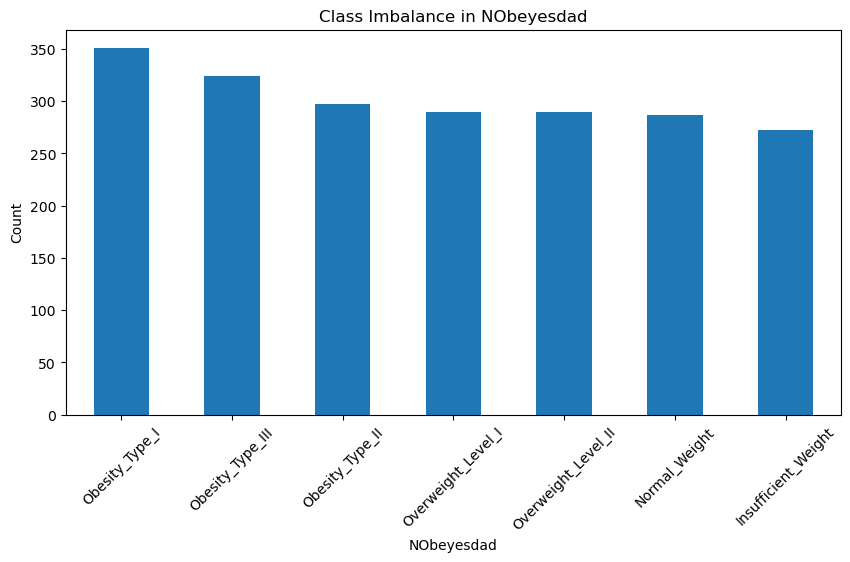

In [8]:
import matplotlib.pyplot as plt

# Get class distribution for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns

# Create plots for each categorical column
for column in categorical_columns:
    class_counts = df[column].value_counts()
    
    # Plot class distribution
    plt.figure(figsize=(10, 5))
    class_counts.plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Class Imbalance in {column}")
    plt.xticks(rotation=45)
    plt.show()
